In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam



c:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Simulation 1 : Parameters are generated uniformly 

In [2]:
# Black-Scholes formula for European call option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Generate synthetic Black-Scholes option prices
def generate_data(n_samples, seed=42):
    np.random.seed(seed)
    S = np.random.uniform(50, 200, n_samples)  # Stock price
    K = np.random.uniform(50, 200, n_samples)  # Strike price
    T = np.random.uniform(1/252, 2, n_samples)  # Time to maturity
    r = np.random.uniform(0.01, 0.05, n_samples)  # Risk-free rate
    sigma = np.random.uniform(0.1, 0.9, n_samples)  # Volatility
    prices = black_scholes_call(S, K, T, r, sigma) / K
    moneyness = S / K
    
    data = pd.DataFrame({'M': moneyness, 'S': S, 'K': K, 'T': T, 'r': r, 'sigma': sigma, 'C/K': prices})

    return data


In [3]:


# split data into training and test sets

# Generate synthetic data
n_samples = 100000

data = generate_data(n_samples)

# Split data into training and test sets
X = data[['M', 'T', 'r', 'sigma']]
y = data['C/K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:


# standardize data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#y_scaler = MinMaxScaler()
#y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()
#y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1)).flatten()

# create a neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(4,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='relu'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

# train the model
model.fit(X_train_scaled, y_train, epochs=30, batch_size=64)

# make predictions on the test set and rescale them
#y_pred = y_scaler.inverse_transform(model.predict(X_test_scaled)).flatten()
y_pred = model.predict(X_test_scaled).flatten()







Epoch 1/30


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0230
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.2835e-05
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.7791e-05
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.5200e-05
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6.6879e-05
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.8407e-05
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.6351e-05
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.5702e-05
Epoch 9/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.1058e-05
Epoch 10/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.0139e-05
Epoch 11/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 6.7575e-05
Epoch 12/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0703e-05
Epoch 13/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0341e-05
Epoch 14/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss:

In [10]:

def CheckAccuracy(y_true, y_pred):
    stats = dict()
    stats['diff'] = y_true - y_pred
    stats['rmse'] = np.sqrt(np.mean(stats['diff']**2))
    print("Root Mean Squared Error:   " , stats['rmse'])
    stats['mape'] = np.mean(np.abs(stats['diff'] / y_true)) 
    print("Mean Absolute Percentage Error:   " , stats['mape'])
    stats['mse'] = np.mean(stats['diff']**2)
    print("Mean Squared Error:   " , stats['mse'])
    stats['mae'] = np.mean(np.abs(stats['diff']))
    print("Mean Absolute Error:   " , stats['mae'])
    stats['r2'] = 1 - np.sum(stats['diff']**2) / np.sum((y_true - np.mean(y_true))**2)
    print("R^2:   " , stats['r2'])
    return stats


CheckAccuracy(y_test, y_pred)




Root Mean Squared Error:    0.005517827814726269
Mean Absolute Percentage Error:    0.11780210371608275
Mean Squared Error:    3.0446423792966875e-05
Mean Absolute Error:    0.003530427068855789
R^2:    0.9998869509803606


{'diff': 75721    0.000479
 80184   -0.001118
 19864    0.000984
 76699    0.007412
 92991    0.002212
            ...   
 32595    0.011450
 29313    0.010025
 37862    0.000338
 53421    0.007398
 42410    0.008236
 Name: C/K, Length: 20000, dtype: float64,
 'rmse': 0.005517827814726269,
 'mape': 0.11780210371608275,
 'mse': 3.0446423792966875e-05,
 'mae': 0.003530427068855789,
 'r2': 0.9998869509803606}

# Analysis

In [ ]:
# plot option prices in a 3D plot as a function of time to maturity and stock price
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['T'], X['M'], y)
ax.set_xlabel('Time to maturity')
ax.set_ylabel('Moneyness')
ax.set_zlabel('Option price')
plt.show()



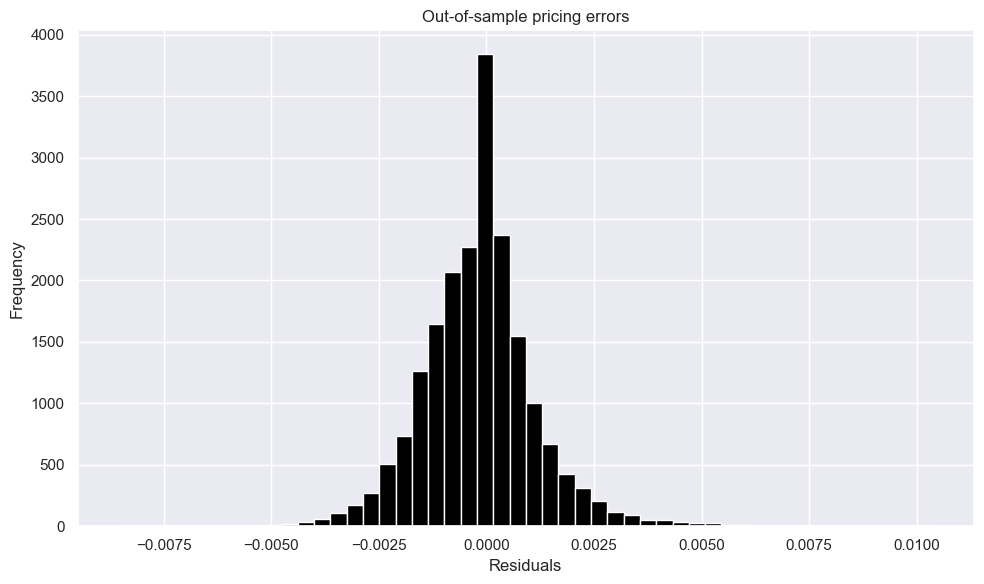

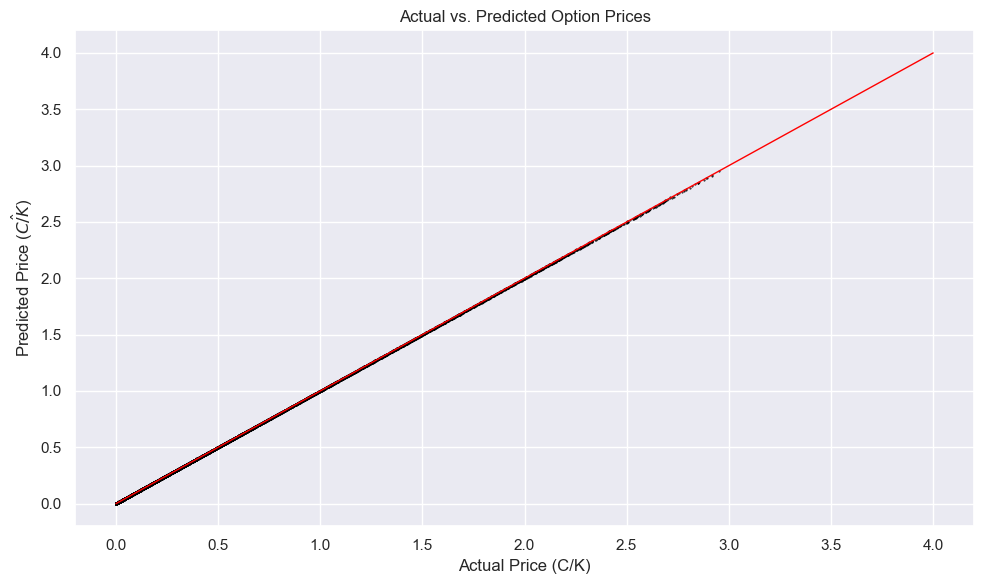

In [14]:


# make a scatter plot of the residuals as a function of the true option price

# residuals as absolute percentage error
ANN_error = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(ANN_error, bins=50, color='black')
plt.title('Out-of-sample pricing errors')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# make a scatter of the real vs predicted values with a line y=x

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='black', s=0.2)
# add a red line x=y for reference
plt.plot([0, 4], [0, 4], color='red', lw=1)
plt.title('Actual vs. Predicted Option Prices')
plt.xlabel('Actual Price (C/K)')
plt.ylabel('Predicted Price ($\hat{C/K}$)')
plt.grid(True)
plt.tight_layout()
plt.show()



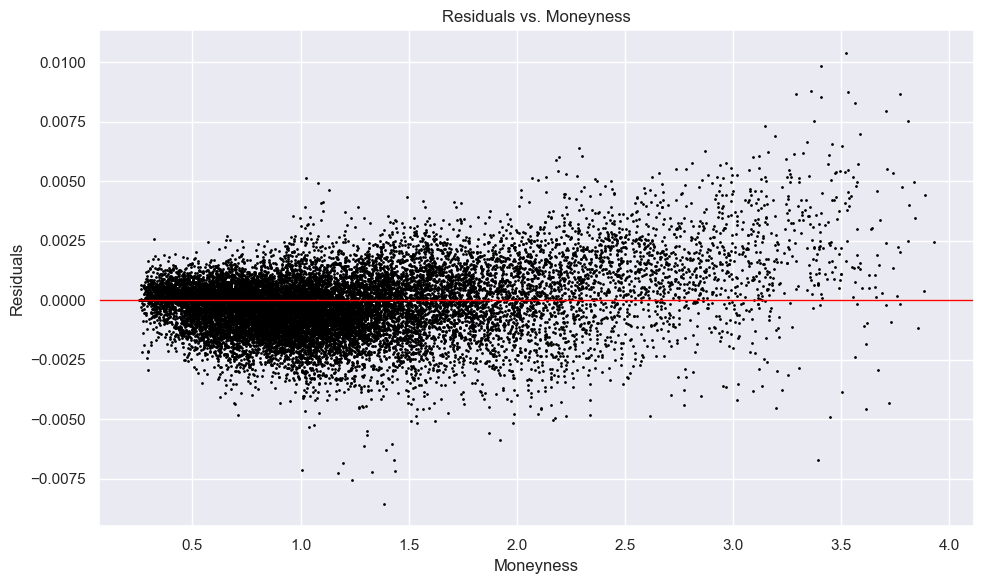

In [7]:
# plot the residuals as a function of monyness

plt.figure(figsize=(10, 6))
plt.scatter(X_test['M'], ANN_error, color='black', s=1)
plt.title('Residuals vs. Moneyness')
plt.xlabel('Moneyness')
plt.axhline(y=0, color='red', lw=1)
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

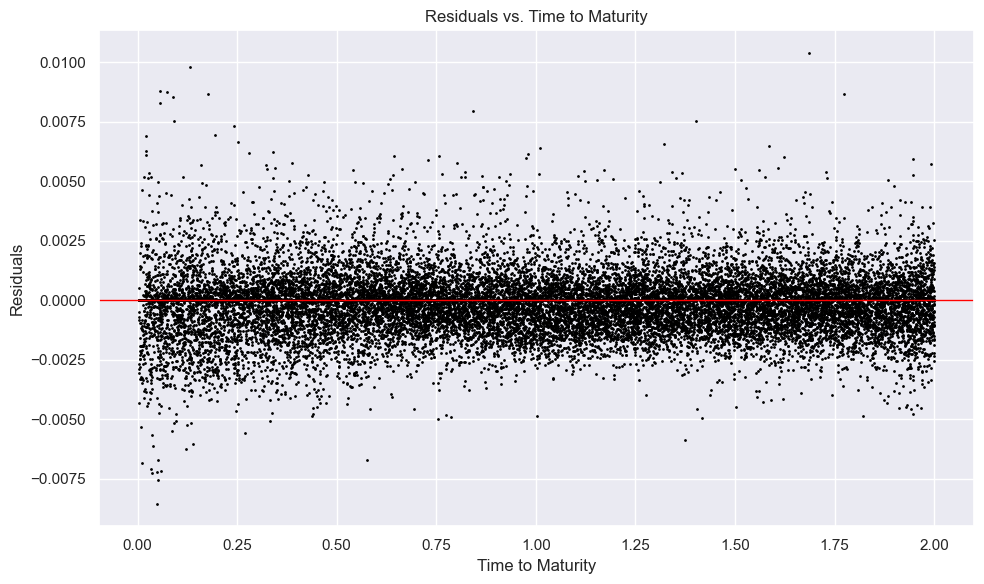

In [8]:
# plot the residuals as a function of time to maturity

plt.figure(figsize=(10, 6))
plt.scatter(X_test['T'], ANN_error, color='black', s=1)
plt.title('Residuals vs. Time to Maturity')
plt.xlabel('Time to Maturity')
plt.axhline(y=0, color='red', lw=1)
plt.ylabel('Residuals')
plt.grid(True)
plt.tight_layout()
plt.show()

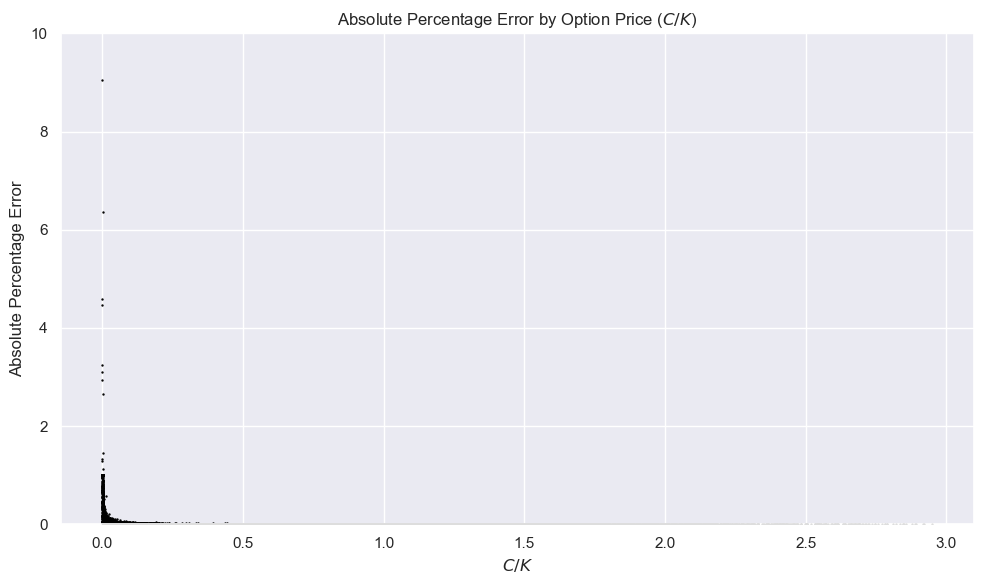

In [11]:
# plot the absolute percentage error as a function the call option price

plt.figure(figsize=(10, 6))
plt.scatter(y_test, np.abs(ANN_error/y_test), color='black', s=0.5)
plt.title('Absolute Percentage Error by Option Price ($C/K$)') 
plt.xlabel('$C/K$')
plt.ylabel('Absolute Percentage Error')
plt.ylim(0, 10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# make a latex table with the RMSE, MAPE, MAE, and R^2

from tabulate import tabulate

stats = CheckAccuracy(y_test, y_pred)

print('')

table = [['RMSE', 'MAPE', 'MAE', 'R^2'],
            [round(stats['rmse'],5), round(stats['mape'],5), round(stats['mae'],5), round(stats['r2'],5)]]
print(tabulate(table, headers='firstrow', tablefmt='latex'))




Root Mean Squared Error:    0.0013383059295870533
Mean Absolute Percentage Error:    0.10847738927174654
Mean Squared Error:    1.7910627611678667e-06
Mean Absolute Error:    0.0009606888179799948
R^2:    0.9999933496987811

\begin{tabular}{rrrr}
\hline
    RMSE &    MAPE &     MAE &     R\^{}2 \\
\hline
 0.00134 & 0.10848 & 0.00096 & 0.99999 \\
\hline
\end{tabular}
